# Task 1: Prediction using Supervised ML

## By Hassan Farid

__Tasks to perform:__ 

1. Predict the percentage of an student based on the no. of study hours. 
2. What will be predicted score if a student studies for 9.25 hrs/ day? 

__Algorithm used:__ Linear Regression using Normal Equation, Stochastic Gradient Descent and SVM

__Tools used:__ Python and Scikit-Learn

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVR
import matplotlib.pyplot as plt

# Exploratory Data Analysis
Before, we head out to train a supervised model on the given data, its better to first the properties of the data and explore it in a detailed manner. 

## Viewing the Data:
Lets first download the data from the provided link and then view it using a Pandas DataFrame.

In [2]:
#Downloading data from the provided link
data_link = "http://bit.ly/w-data"
data_df = pd.read_csv(data_link) #Since the provided data is in CSV format

In [3]:
#Viewing the starting 5 rows from the data
data_df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#Viewing the size of the data (The number of rows)
len(data_df)

25

In [5]:
#Viewing whether there are any null or missing values in the dataset
data_df.isnull().values.any()

False

In [6]:
#Viewing the complete info about the dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Plotting the Data
Now that we have explored the data and that there are no missing values or any sort of cleaning or transformation to perform, we can plot the data to view the relation between the Hours and Scores of Students 

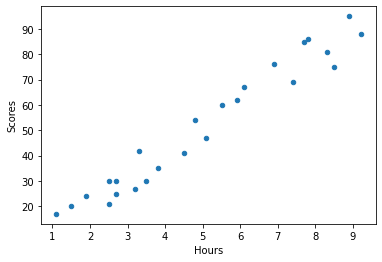

In [7]:
#Visualizing the relation between Hours and Scores using a Scatter plot
data_df.plot(kind="scatter", x="Hours", y="Scores")

From the graph, we can observe that the increase in Scores obtained by Students is directly proportional to the number of Hours they are studying, this means that there is a possibility of a Linear Relation between them.

# Training Model for Prediction
Now that we have a good idea of what our data is and the relation between the attributes of our data, lets start the model training process for our dataset to predict for new values

## Splitting Data:
Before we start our model selection and training, we have to split the provided data into training and testing datasets.

In [8]:
#First seperating the features and labels from the given data
X = data_df.loc[:, data_df.columns != 'Scores'].values
y = data_df['Scores'].values

In [9]:
#Vieiwing the feature vector for our model
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [10]:
#Viewing the labels for our model
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [11]:
#Now seperating the features and labels for training and testing dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [12]:
#Viewing the shape of the data 
print("Training Data: X.shape={} , y.shape={}".format(X_train.shape, y_train.shape))
print("Testing Data: X.shape={} , y.shape={}".format(X_test.shape, y_test.shape))

Training Data: X.shape=(20, 1) , y.shape=(20,)
Testing Data: X.shape=(5, 1) , y.shape=(5,)


## Looking for Best Model:
Now that the data has been split into testing and training data, we can look for the best model to train on this data i.e. the model which will give us the most accurate results

### Using Linear Regressor:
We can use the Scikit's built-in Linear Regressor to check the results

In [13]:
#Creating a Linear Regression instance and fitting it on the training set
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [14]:
#Viewing the intercept and coefficient values obtained from the model
print("Intercept: {} ; Coefficients: {}".format(linear_reg.intercept_, linear_reg.coef_))

Intercept: 2.826892353899737 ; Coefficients: [9.68207815]


In [15]:
#Creating linear regression line using intercept and coefficient (y0 = mx + b)
y0 = (linear_reg.coef_ * X_train) + linear_reg.intercept_

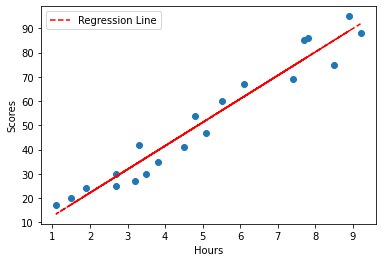

In [16]:
#Plotting obtained Linear Regression model results
plt.scatter(X_train, y_train)
plt.plot(X_train, y0, 'r--', label='Regression Line')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

In [17]:
#Checking Root Mean Squared Error for the Regression Model
y_pred = linear_reg.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 4.352380006653288


### Using Stochastic Gradient Descent(SGD) Regressor:
Another Linear Regressor provided by the scikit library is the SGD Regressor, lets test the performance of this model on the given dataset

In [18]:
#Creating a SGD instance and running it on our dataset 

#Defining attributes for the Regressor
epochs = 50 #Run 50 times for the training set
eta = 0.005 #Learning rate of the Regressor

#Fitting the SGD Regressor
sgd_reg = SGDRegressor(n_iter_no_change=epochs, penalty=None, eta0=eta)
sgd_reg.fit(X_train, y_train.ravel())

C:\Users\Mr. Ghori\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDRegressor(eta0=0.005, n_iter_no_change=50, penalty=None)

In [19]:
#Checking the Root Mean Squared Error for the Regression Model
y_pred = sgd_reg.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 4.34422022368743


### Using Support Vector Machines
We can also use the Support Vector Linear Regressor to get the job done. 

In [20]:
#Creating a Linear SVR Regressor
svm_reg = LinearSVR(epsilon=6.65)
svm_reg.fit(X_train, y_train)

LinearSVR(epsilon=6.65)

In [21]:
y_pred = svm_reg.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 4.197778527090912


# Predicting Results 
Now that we have selected SVM Regressor as the best model for the task, we move to predicting the provided new value

In [22]:
#Prediciting using SVR for 9.25 hours 
pred_score = svm_reg.predict([[9.25]])
print("Predicted Score for a Student studying 9.25 hours per day is: {}".format(pred_score))

Predicted Score for a Student studying 9.25 hours per day is: [93.70862989]
